In [122]:
import pandas as pd
import numpy as np
import re
from flask import Flask , render_template , request, jsonify
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path

In [123]:
alay = pd.read_csv(r"C:\Users\ahmad\Project\Tugas Akhir/new_kamusalay.csv" , encoding="latin-1", header=None)

In [124]:
alay.head()

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [125]:
alay = alay.rename(columns={
    0:"Awal",
    1:"Baru"
})

In [126]:
alay.head()

,Awal,Baru
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [127]:
alay_dict = dict(zip(alay["Awal"], alay["Baru"]))
alay_dict

{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakw

In [128]:
def hurufkecil(text):
    return text.lower()

def cleaningemoji(text):
    text = re.sub('\w*\d\w*', '', text)
    return text

def cleaningpertama(text):
    text = re.sub('\n',' ', text)
    text = re.sub('url',' ', text)
    text = re.sub('rt',' ', text)
    text = re.sub('user',' ', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ', text)
    text = re.sub('xd',' ', text)
    text = re.sub('  +', ' ', text)
    return text

def cleaningkedua(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

def gantikataalay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])


In [129]:
def semua_fungsi_API1(text):
    text = hurufkecil(text)
    text = cleaningemoji(text)
    text = cleaningpertama(text)
    text = cleaningkedua(text)
    text = gantikataalay(text)
    return text

In [130]:
def semua_fungsi_API2(text):
    text = hurufkecil(text)
    text = cleaningemoji(text)
    text = cleaningpertama(text)
    text = cleaningkedua(text)
    return text

In [131]:
app = Flask(__name__)
Text = input("Masukkan text yang ingin di cleaning: ")
@app.route("/",methods=["GET"])
def CleaningText():
    json_response = {
        'status_code': 200,
        'description': "Original Teks",
        'data':semua_fungsi_API2(Text)
    }
    response_data = jsonify(json_response)
    return response_data
if __name__ == "__main__":
    app.run()

KeyboardInterrupt: Interrupted by user

In [119]:
app = Flask(__name__,template_folder=r"C:\Python\Flask API\flask_api-master\21 - Flask API\templates")

@app.route("/",methods=["GET","POST"])
def index():
    if request.method == "GET":
        return render_template("upload.html")
    
    elif request.method == "POST":
        csv_file = request.files.get("file")
        X_test = pd.read_csv(csv_file, encoding="latin-1")
        X_test['Tweet'] = X_test['Tweet'].apply(semua_fungsi_API1)
        csv_data = X_test.to_csv(r'C:\\Users\\ahmad\\Project\\Tugas Akhir\\testing12121.csv')
        return csv_data               
    
if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Dec/2022 21:34:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Dec/2022 21:34:30] "GET /static/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [24/Dec/2022 21:34:30] "GET /static/favicon.ico HTTP/1.1" 404 -
[2022-12-24 21:34:35,300] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "C:\Users\ahmad\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\ahmad\anaconda3\lib\site-packages\flask\app.py", line 1953, in full_dispatch_request
    return self.finalize_request(rv)
  File "C:\Users\ahmad\anaconda3\lib\site-packages\flask\app.py", line 1968, in finalize_request
    response = self.make_response(rv)
  File "C:\Users\ahmad\anaconda3\lib\site-packages\flask\app.py", line 2097, in make_response
    raise TypeError(
TypeError: The view function did not return a valid response. The function either returned None or ended w

In [132]:
Path('Twit.db').touch()

In [133]:
conn = sqlite3.connect('Twit.db',check_same_thread=False)
c = conn.cursor()

In [134]:
c.execute('CREATE TABLE IF NOT EXISTS TWHS (Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong)')
conn.commit()

In [135]:
data = pd.read_csv(r"C:\Users\ahmad\Project\Tugas Akhir/Data_Bersih.csv")

In [136]:
data.to_sql("Data_Tweet",conn,if_exists='replace')

13169

In [137]:
data= pd.read_sql("SELECT * FROM Data_Tweet",conn)

In [138]:
data.head(1)

,index,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0,0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0


In [139]:
data.drop(columns=["index","Unnamed: 0"], inplace=True)

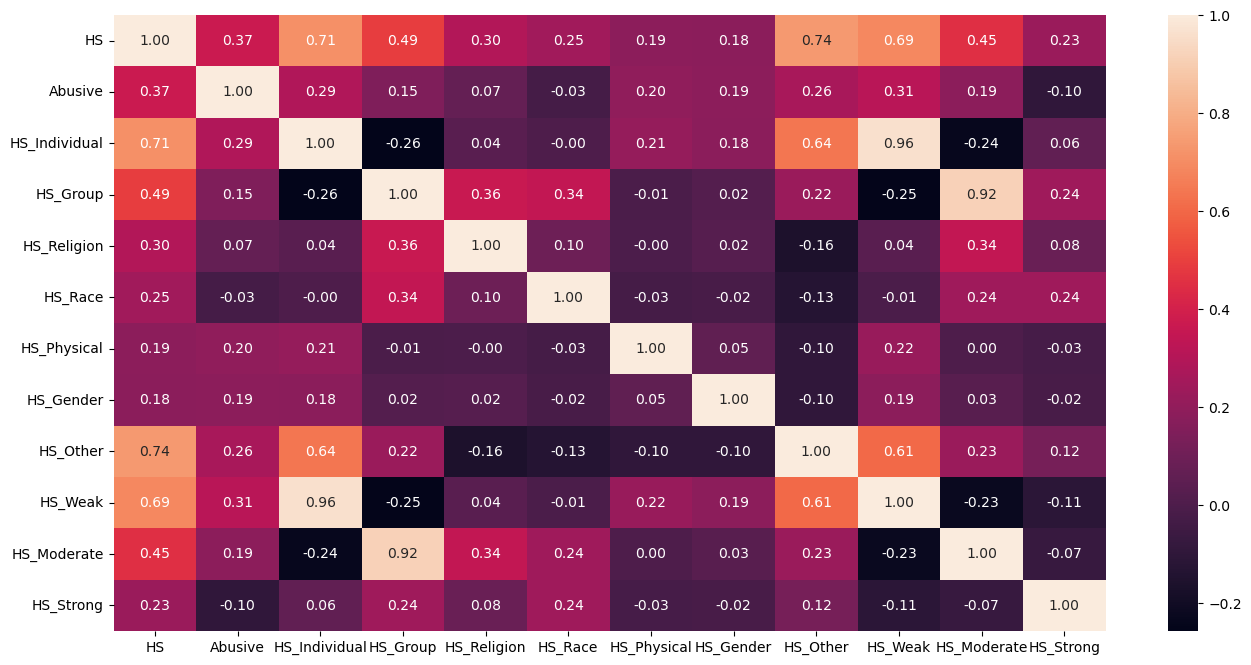

In [142]:
ax = plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(),annot=True, fmt=".2f")
plt.show()

In [81]:
data.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [85]:
data.loc[:,"HS_Weak":"HS_Strong"].sum()

HS_Weak        3383
HS_Moderate    1705
HS_Strong       473
dtype: int64

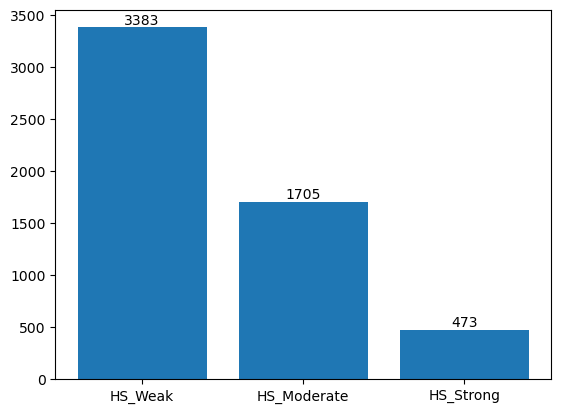

In [89]:
fig, ax = plt.subplots()
ax.bar(data.loc[:,"HS_Weak":"HS_Strong"].sum().index, data.loc[:,"HS_Weak":"HS_Strong"].sum())
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [65]:
data.loc[:,"HS_Individual":"HS_Other"].sum()

HS_Individual    3575
HS_Group         1986
HS_Religion       793
HS_Race           566
HS_Physical       323
HS_Gender         306
HS_Other         3740
dtype: int64

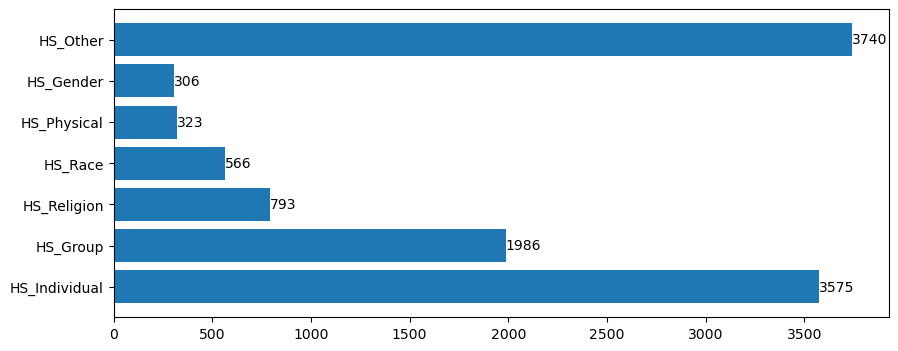

In [90]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(data.loc[:, "HS_Individual":"HS_Other"].sum().index,
        data.loc[:, "HS_Individual":"HS_Other"].sum())
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

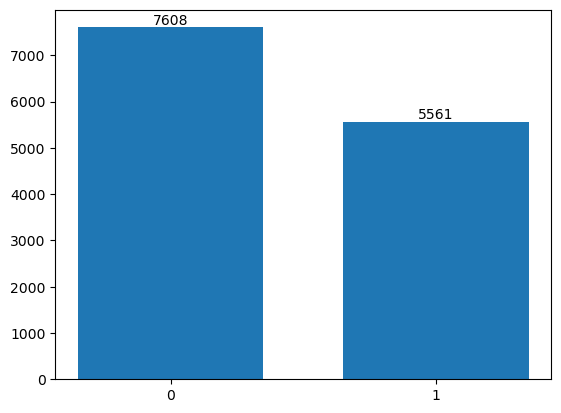

In [93]:
x_label = ["0","1"]
fig, ax =plt.subplots()
ax.bar(x_label, data.HS.value_counts(), width = 0.7)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

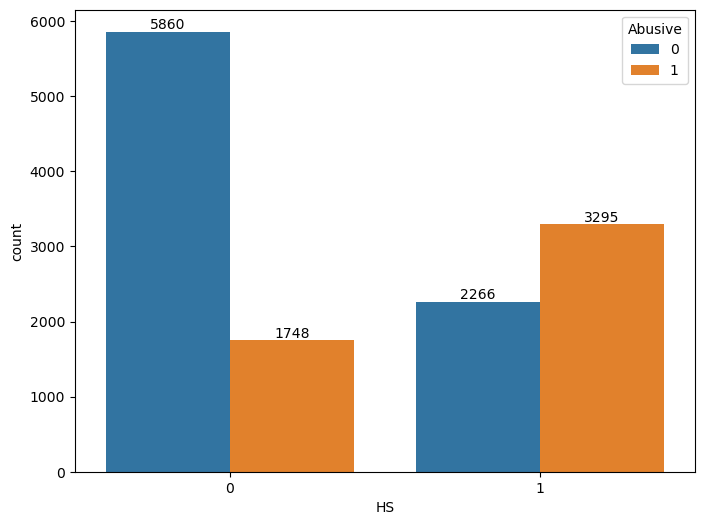

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="HS", data=data, hue="Abusive")
for i in ax.containers:
    ax.bar_label(i)

In [45]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


In [50]:
data["Banyaknya_huruf"] = data.Tweet.apply(lambda x: len(x))

In [51]:
data["Banyaknya_kata"] = data.Tweet.apply(lambda x: len(x.split(" ")))

In [52]:
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Banyaknya_huruf,Banyaknya_kata
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,135,24
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0,109,21
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0,249,39
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0,68,16
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0,78,14


In [61]:
print(data.loc[data["HS"]==1,"Banyaknya_huruf"].mean())
print(data.loc[data["HS"]==0,"Banyaknya_huruf"].mean())
print(data.loc[data["HS"]==1,"Banyaknya_kata"].mean())
print(data.loc[data["HS"]==0,"Banyaknya_kata"].mean())

96.62992267577773
116.42547318611987
16.368279086495235
19.44768664563617


In [95]:
data1 = data.copy()
data1.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau kamu edan sarap ...,0,1,0,0,0,0,0,0,0,0,0,0
2,kadang aku berpikir kenapa aku tetap percaya ...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku dan ku tau matamu sipit tapi dili...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


In [96]:
def bersihkan_kata(text):
    text = re.sub(r"\bdan\b","",text)
    text = re.sub(r"\btidak\b","",text)
    text = re.sub(r"\byang\b","",text)
    text = re.sub(r"\bkamu\b","",text)
    text = re.sub(r"\bdengan\b","",text)
    text = re.sub(r"\bsama\b","",text)
    text = re.sub(r"\bdan\b","",text)
    text = re.sub(r"\bya\b","",text)
    text = re.sub(r"\buntuk\b","",text)
    text = re.sub(r"\bsudah\b","",text)
    text = re.sub(r"\bada\b","",text)
    text = re.sub(r"\bdari\b","",text)
    text = re.sub(r"\bdi\b","",text)
    text = re.sub(r"\bitu\b","",text)
    text = re.sub(r"\bkalau\b","",text)
    text = re.sub(r"\bsaja\b","",text)
    text = re.sub(r"\bgue\b","",text)
    text = re.sub(r"\bsih\b","",text)
    text = re.sub(r"\bsaya\b","",text)
    text = re.sub(r"\blah\b","",text)
    text = re.sub(r"\bapa\b","",text)
    text = re.sub(r"\btau\b","",text)
    text = re.sub(r"\bkok\b","",text)
    text = re.sub(r"\bbukan\b","",text)
    text = re.sub(r"\bke\b","",text)
    text = re.sub(r"\bmereka\b","",text)
    text = re.sub(r"\bkarena\b","",text)
    text = re.sub(r"\blagi\b","",text)
    text = re.sub(r"\bkak\b","",text)
    text = re.sub(r"\banda\b","",text)
    text = re.sub(r"\baku\b","",text)
    text = re.sub(r"\bini\b","",text)
    text = re.sub(r"\bdalam\b","",text)
    text = re.sub(r"\bjadi\b","",text)
    text = re.sub(r"\bkita\b","",text)
    text = re.sub(r"\bbisa\b","",text)
    text = re.sub(r"\biya\b","",text)
    text = re.sub(r"\bmau\b","",text)
    text = re.sub(r"\bmemang\b","",text)
    text = re.sub(r"\bhaha\b","",text)
    text = re.sub(r"\blebih\b","",text)
    text = re.sub(r"\bjangan\b","",text)
    text = re.sub(r"\bdia\b","",text)
    text = re.sub('  +', ' ', text)
    return text

data1.Tweet = data1.Tweet.apply(bersihkan_kata)

In [97]:
bersihkan_kata("siapa yang telat memberi tau kamu edan sarap")

'siapa telat memberi edan sarap'

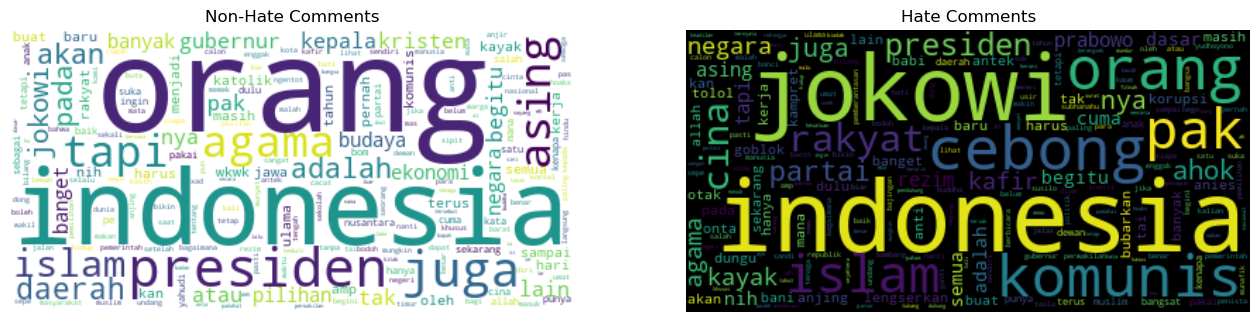

In [98]:
fig,axs=plt.subplots(1,2,figsize=(16,8))
text_pos = " ".join(data1["Tweet"][data1.HS == 0])
text_neg = " ".join(data1["Tweet"][data1.HS == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()